# Analyzing inertial parameter estimation in simulation
## Read Text file and make variables

In [1]:
#!/usr/bin/env python3

# read text files

import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy import signal, fftpack
from scipy.signal import savgol_filter
%matplotlib inline

# enter data file here

data_file = "data_file_03-14-19_20-57-06"
# info about data_file_03-14-19_12-55-13
# RLS controller drawing circles
# correct estimation m,com, wrong inertia
# gravity included

# info about data_file_03-14-19_15-17-59
# Trajectory testing with sin yaxis
# gravity included
# wrong estimation m,com,inertia T

# info about data_file_03-14-19_15-21-49
# RLS controller with sin yaxis
# gravity removed
# right estimation m, wrong com,inertia

# info about data_file_03-14-19_16-12-11
# RLS controller with sin yaxis + move up and down
# gravity removed
# right estimation m,com wrong inertia

# info about data_file_03-14-19_20-57-06
# estimation controller with sin yaxis + move up and down
# gravity removed
# right estimation m,com wrong inertia



path = "/home/elenakern/Codes/sai2.0/applications/data_collection/simulation/inertial_params_est/"
path_data_file = path + data_file

file = np.loadtxt(path_data_file,skiprows=1)

accel           = file[0::,0:3]     #linear acceleration (end-effector in last link frame)
avel            = file[0::,3:6]     #angular velocity (end-effector in last link frame)
aaccel          = file[0::,6:9]     #angular acceleration (end-effector in last link frame)
g_local         = file[0::,9:12]    #gravity vector (end-effector in last link frame)
force_virtual   = file[0::,12:15]   #virtual force simulation
torque_virtual  = file[0::,15:18]   #virtual torque simulation
phi             = file[0::,18:28]   #inertial parameters
mass            = file[0::,18:19]   #estimated mass
center_of_mass  = file[0::,19:22]   #estimated center of mass
inertial_tensor = file[0::,22:28]   #estimated inertia tensor

time = np.arange(np.size(accel[:,0]))
time = time/1000




## Plotting functions
### TUM colors

In [2]:
#TUM colors rgb
blue = (0,0.3961,0.7412)
red = (0.7686,0.0275,0.1059)
green =(0,0.4863,0.1882)
orange =  (0.8902, 0.4471, 0.1333)
purple = (0.4118, 0.0314, 0.3529)
grey = (0.6118, 0.6157, 0.6235)
yellow = (0.9765, 0.7294, 0)

### Function definitions

In [3]:
def Plot_three_dim(time, data, ylabel, title, subtitle):
    f, axarr = plt.subplots(3,1,figsize=(7,9))
    f.suptitle(title, fontsize=20)
    coordinates = ["$_x$","$_y$","$_z$"]
    for idx,coordinate in enumerate(coordinates):
        axarr[idx].plot(time, data[:,idx], c=blue)
        axarr[idx].set_title(subtitle+str(coordinate))
        axarr[idx].set_xlim([0, time[-1]])
        axarr[idx].set_ylabel(ylabel)
    axarr[2].set_xlabel("Elapsed time in $s$")
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

def Plot_intertial_params(time, data):
    f, axarr = plt.subplots(7,1,figsize=(9,9))
    f.suptitle("Inertial Parameter Estimation", fontsize=20)
    params = ['Mass in $kg$', 'COM_x in $m$','COM_y in $m$', 'COM_z in $m$', '$I_{xx}$','$I_{xy}$', '$I_{xz}$','$I_{yx}$','$I_{yy}$','$I_{yz}$', '$I_{zx}$','$I_{zy}$','$I_{zz}$']
    for idx, param in enumerate(params):
        axarr[idx].plot(time, data[:,idx], c=blue)
        axarr[idx].set_title(param)
        axarr[idx].set_xlim([0, time[-1]])
    axarr[6].set_xlabel("Elapsed time in $s$")
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
def Plot_one_dim(time, data, ylabel, title):
    plt.plot(time, data)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Elapsed time in $s$")

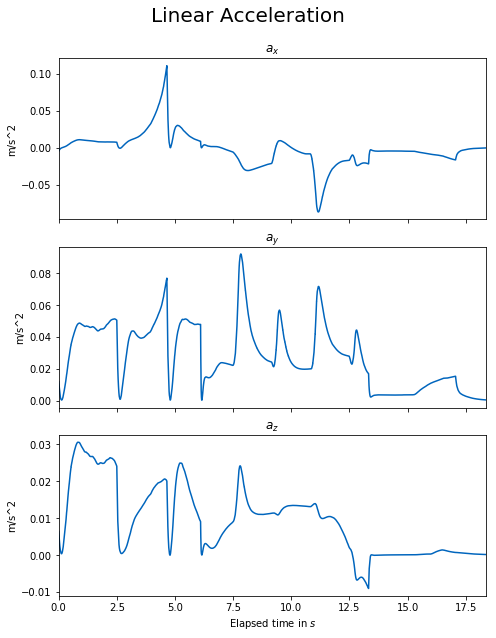

In [4]:
Plot_three_dim(time, accel, 'm/s^2',"Linear Acceleration", "$a$")

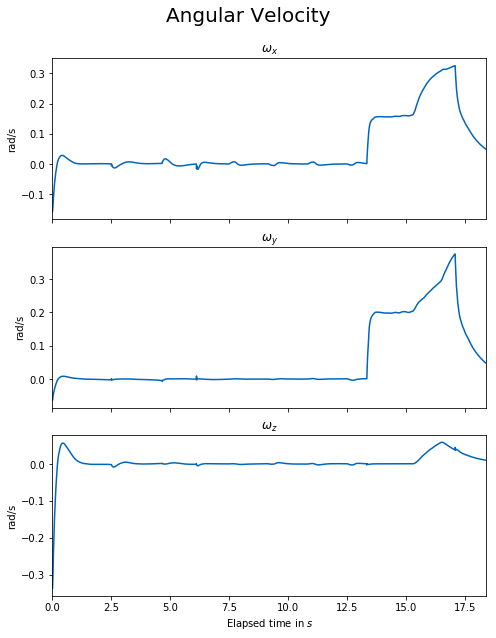

In [5]:
Plot_three_dim(time, avel, 'rad/s', "Angular Velocity", "$\omega$")

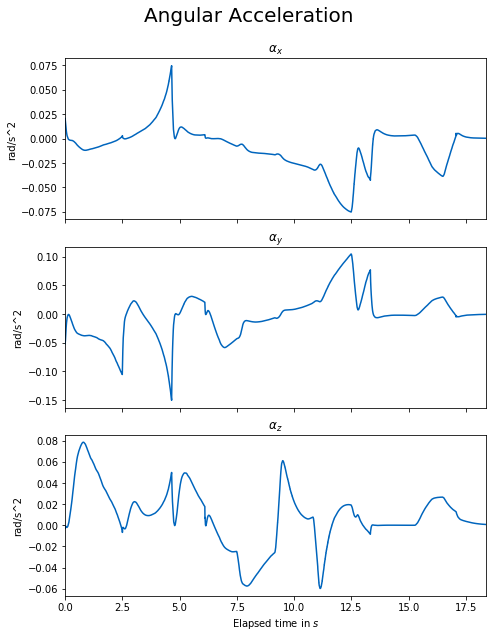

In [6]:
Plot_three_dim(time, aaccel, 'rad/s^2', "Angular Acceleration", "$α$")

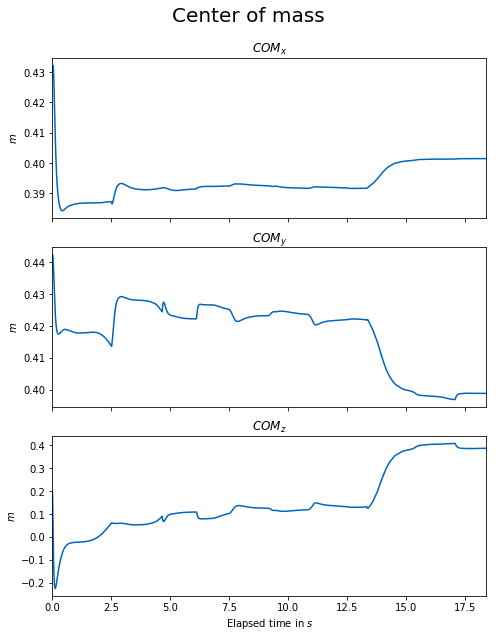

In [7]:
Plot_three_dim(time, center_of_mass/mass, '$m$', "Center of mass", "$COM$")

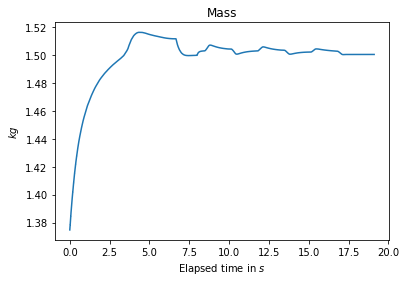

In [123]:
Plot_one_dim(time, mass, '$kg$', "Mass")

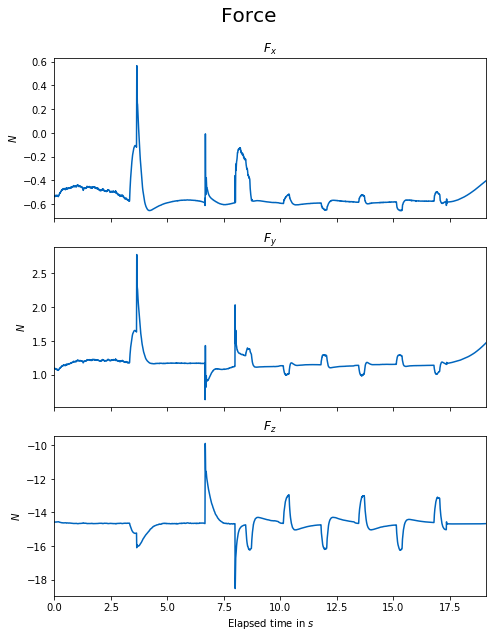

In [125]:
Plot_three_dim(time, force_virtual, '$N$', 'Force', '$F$')

In [ ]:
Plot_three_dim(time, torque_virtual, '$Nm$', '', '$F$')